In [2]:
# lab8_fs.ipynb
# 21 Jun 2025
# Feature Selection Techniques

Top 5 features by Mutual Information:
['mean concave points' 'worst radius' 'worst perimeter' 'worst area'
 'worst concave points']

Top 5 features by RFE:
['radius error' 'worst radius' 'worst texture' 'worst area'
 'worst concave points']

Selected features by L1 Regularization:
['mean concave points' 'mean symmetry' 'radius error' 'texture error'
 'smoothness error' 'compactness error' 'symmetry error'
 'fractal dimension error' 'worst radius' 'worst texture' 'worst area'
 'worst smoothness' 'worst concavity' 'worst symmetry']


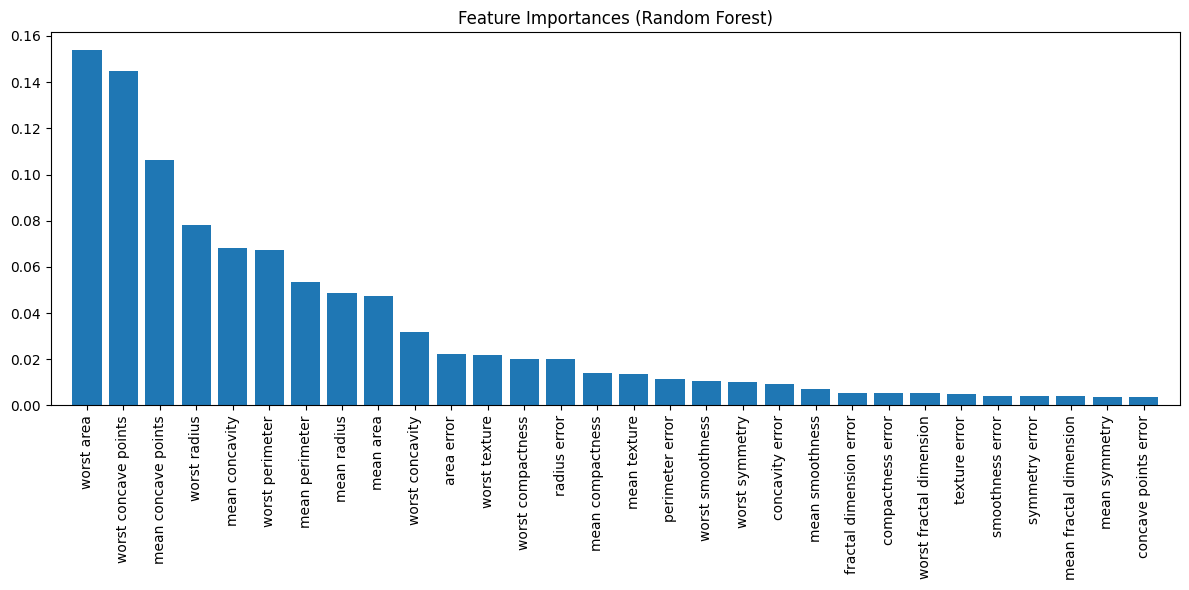


Comparison of selected features:
                         Mutual Information    RFE     L1  RF Importance
mean radius                           False  False  False          False
mean texture                          False  False  False          False
mean perimeter                        False  False  False          False
mean area                             False  False  False          False
mean smoothness                       False  False  False          False
mean compactness                      False  False  False          False
mean concavity                        False  False  False           True
mean concave points                    True  False   True           True
mean symmetry                         False  False   True           True
mean fractal dimension                False  False  False          False
radius error                          False   True   True          False
texture error                         False  False   True          False
perimeter error  

In [4]:
"""
Feature Selection Demonstration
This program demonstrates various feature selection techniques:
- Filter methods (correlation, mutual information)
- Wrapper methods (recursive feature elimination)
- Embedded methods (L1 regularization)
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import (SelectKBest, mutual_info_classif,
                                     RFE, SelectFromModel)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Filter Method - Mutual Information
selector_mi = SelectKBest(mutual_info_classif, k=5)
X_train_mi = selector_mi.fit_transform(X_train_scaled, y_train)
selected_features_mi = feature_names[selector_mi.get_support()]

print("Top 5 features by Mutual Information:")
print(selected_features_mi)

# 2. Wrapper Method - Recursive Feature Elimination
model_rfe = LogisticRegression(max_iter=10000)
selector_rfe = RFE(model_rfe, n_features_to_select=5, step=1)
X_train_rfe = selector_rfe.fit_transform(X_train_scaled, y_train)
selected_features_rfe = feature_names[selector_rfe.get_support()]

print("\nTop 5 features by RFE:")
print(selected_features_rfe)

# 3. Embedded Method - L1 Regularization
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000, random_state=42)
model_l1.fit(X_train_scaled, y_train)
selector_l1 = SelectFromModel(model_l1, prefit=True)
X_train_l1 = selector_l1.transform(X_train_scaled)
selected_features_l1 = feature_names[selector_l1.get_support()]

print("\nSelected features by L1 Regularization:")
print(selected_features_l1)

# 4. Tree-based Feature Importance
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)
importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

# Compare selected features
print("\nComparison of selected features:")
comparison = pd.DataFrame({
    'Mutual Information': [f in selected_features_mi for f in feature_names],
    'RFE': [f in selected_features_rfe for f in feature_names],
    'L1': [f in selected_features_l1 for f in feature_names],
    'RF Importance': [indices[i] < 5 for i in range(len(feature_names))]
}, index=feature_names)
print(comparison)